# Crime Rate Prediction Project
## Problem Statement
Rising crime rates in urban areas like San Francisco pose significant challenges to public safety. Predicting crime patterns can help law enforcement allocate resources effectively and reduce crime.
## Objectives
- Identify crime hotspots using geospatial clustering.
- Predict crime categories based on location, time, and district.
- Analyze temporal patterns to optimize police patrols.
## Scope
This project uses the SF Crime Rate dataset from Kaggle, covering crime incidents in San Francisco with features like Dates, Category, PdDistrict, and coordinates (X, Y).

In [15]:
import pandas as pd 
import numpy as np

In [16]:
data = pd.read_csv(r"../data/train.csv")

In [17]:
data.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [18]:
data.columns

Index(['Dates', 'Category', 'Descript', 'DayOfWeek', 'PdDistrict',
       'Resolution', 'Address', 'X', 'Y'],
      dtype='object')

- `Dates`: وقت الجريمة
- `Category`: نوع الجريمة
- `Descript`: وصف إضافي للجريمة
- `DayOfWeek`: اليوم ال حصلت فيه الجريمة
- `PdDistrict`: اسم المنطقة
- `Resolution`: نتيجة الجريمة (اتحلّت؟ اتحكم فيها؟)
- `Address`: العنوان التفصيلي
- `X , Y`: Latitiude, longitude

## Data Collection
The dataset is sourced from the Kaggle SF Crime Rate Prediction competition. It contains 878,049 crime incidents in San Francisco with the following features:
- Dates: Timestamp of the crime.
- Category: Type of crime (target variable).
- Descript: Detailed description of the crime.
- DayOfWeek: Day of the week.
- PdDistrict: Police district.
- Resolution: Outcome of the crime.
- Address: Location of the crime.
- X, Y: Longitude and latitude coordinates.

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Dates       878049 non-null  object 
 1   Category    878049 non-null  object 
 2   Descript    878049 non-null  object 
 3   DayOfWeek   878049 non-null  object 
 4   PdDistrict  878049 non-null  object 
 5   Resolution  878049 non-null  object 
 6   Address     878049 non-null  object 
 7   X           878049 non-null  float64
 8   Y           878049 non-null  float64
dtypes: float64(2), object(7)
memory usage: 60.3+ MB


In [20]:
data.isnull().sum()

Dates         0
Category      0
Descript      0
DayOfWeek     0
PdDistrict    0
Resolution    0
Address       0
X             0
Y             0
dtype: int64

- #### All columns are object except X, Y 
- #### No missing values

In [21]:
data.describe()

,X,Y
count,878049.000000,878049.000000
mean,-122.422616,37.771020
std,0.030354,0.456893
min,-122.513642,37.707879
25%,-122.432952,37.752427
50%,-122.416420,37.775421
75%,-122.406959,37.784369
max,-120.500000,90.000000


In [22]:
data["Category"].value_counts().sort_values(ascending = False)

Category
LARCENY/THEFT                  174900
OTHER OFFENSES                 126182
NON-CRIMINAL                    92304
ASSAULT                         76876
DRUG/NARCOTIC                   53971
VEHICLE THEFT                   53781
VANDALISM                       44725
WARRANTS                        42214
BURGLARY                        36755
SUSPICIOUS OCC                  31414
MISSING PERSON                  25989
ROBBERY                         23000
FRAUD                           16679
FORGERY/COUNTERFEITING          10609
SECONDARY CODES                  9985
WEAPON LAWS                      8555
PROSTITUTION                     7484
TRESPASS                         7326
STOLEN PROPERTY                  4540
SEX OFFENSES FORCIBLE            4388
DISORDERLY CONDUCT               4320
DRUNKENNESS                      4280
RECOVERED VEHICLE                3138
KIDNAPPING                       2341
DRIVING UNDER THE INFLUENCE      2268
RUNAWAY                          1946
LIQ

> عدد نوع كل جريمة و نلاحظ ان اكتر 3 انواع
 - LARCENY/THEFT                  174900
 - OTHER OFFENSES                 126182
 - NON-CRIMINAL                    92304

In [23]:
data['DayOfWeek'].value_counts().sort_values(ascending = False)

DayOfWeek
Friday       133734
Wednesday    129211
Saturday     126810
Thursday     125038
Tuesday      124965
Monday       121584
Sunday       116707
Name: count, dtype: int64

أكتر الايام ال بيحصل فيها جريمة هي يوم الجمعه 

In [24]:
data['PdDistrict'].value_counts().sort_values(ascending = False)

PdDistrict
SOUTHERN      157182
MISSION       119908
NORTHERN      105296
BAYVIEW        89431
CENTRAL        85460
TENDERLOIN     81809
INGLESIDE      78845
TARAVAL        65596
PARK           49313
RICHMOND       45209
Name: count, dtype: int64

اكتر المناطق ال بيحصل فيها جريمة 

In [31]:
data[["PdDistrict","DayOfWeek"]].value_counts().unstack()

DayOfWeek,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
PdDistrict,,,,,,,
BAYVIEW,13681,12649,12440,11965,12406,12816,13474
CENTRAL,13397,11130,14067,12197,11633,11289,11747
INGLESIDE,11881,11282,10845,10346,11298,11546,11647
MISSION,18190,16587,17213,15874,17045,17282,17717
NORTHERN,16331,14300,15487,14271,15082,14568,15257
PARK,7610,6945,6913,6646,7047,6871,7281
RICHMOND,6850,6352,6434,6089,6494,6477,6513
SOUTHERN,24458,21184,23277,20810,22527,22013,22913
TARAVAL,10207,9257,9024,8331,9370,9605,9802


In [38]:
district_day_counts = data[["PdDistrict", "DayOfWeek"]].value_counts().unstack()
# Add a column for the day with the highest crime count for each district.
district_day_counts["maxCrimeDay"] = district_day_counts.idxmax(axis = 1)
district_day_counts["maxCrimeDay"]

PdDistrict
BAYVIEW          Friday
CENTRAL        Saturday
INGLESIDE        Friday
MISSION          Friday
NORTHERN         Friday
PARK             Friday
RICHMOND         Friday
SOUTHERN         Friday
TARAVAL          Friday
TENDERLOIN    Wednesday
Name: maxCrimeDay, dtype: object

هنلاحظ ان معظم الجرايم بتحصل يوم الجمعة

In [43]:
district_day_counts['maxCrimeCount'] = district_day_counts.drop('maxCrimeDay', axis=1, errors='ignore').max(axis=1)
district_day_counts["maxCrimeCount"]

PdDistrict
BAYVIEW       13681
CENTRAL       14067
INGLESIDE     11881
MISSION       18190
NORTHERN      16331
PARK           7610
RICHMOND       6850
SOUTHERN      24458
TARAVAL       10207
TENDERLOIN    12860
Name: maxCrimeCount, dtype: int64

عدد الجرايم ف اكتر يوم بيحصل فيه جرايم

In [44]:
result = district_day_counts[['maxCrimeDay', 'maxCrimeCount']].sort_values(by='maxCrimeCount', ascending=False)
result

DayOfWeek,maxCrimeDay,maxCrimeCount
PdDistrict,,
SOUTHERN,Friday,24458
MISSION,Friday,18190
NORTHERN,Friday,16331
CENTRAL,Saturday,14067
BAYVIEW,Friday,13681
TENDERLOIN,Wednesday,12860
INGLESIDE,Friday,11881
TARAVAL,Friday,10207
PARK,Friday,7610


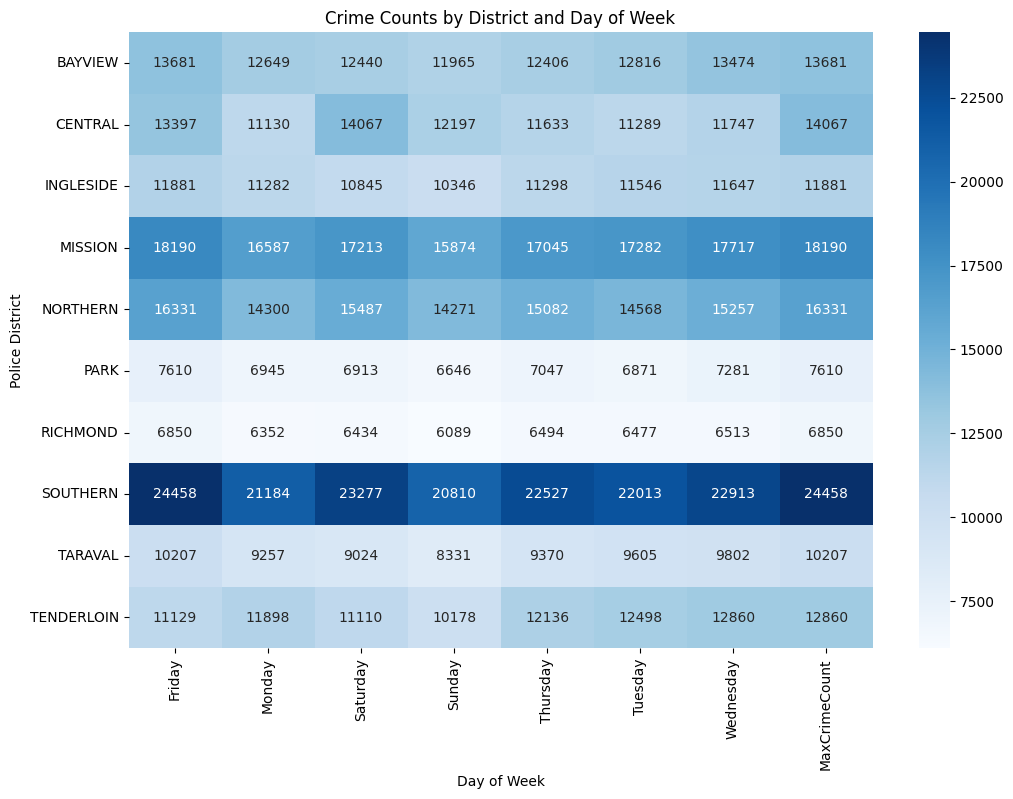

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(district_day_counts.drop(['maxCrimeDay', 'maxCrimeCount'], axis=1), 
            annot=True, fmt='.0f', cmap='Blues')
plt.title('Crime Counts by District and Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Police District')
plt.show()

In [46]:
for district, max_day in result['maxCrimeDay'].items():
    crimes_on_max_day = data[(data['PdDistrict'] == district) & (data['DayOfWeek'] == max_day)]
    print(f"\nTop Crime Categories in {district} on {max_day}:")
    print(crimes_on_max_day['Category'].value_counts().head(5))


Top Crime Categories in SOUTHERN on Friday:
Category
LARCENY/THEFT     6758
OTHER OFFENSES    3121
NON-CRIMINAL      3094
ASSAULT           1798
WARRANTS          1309
Name: count, dtype: int64

Top Crime Categories in MISSION on Friday:
Category
LARCENY/THEFT     2846
OTHER OFFENSES    2841
NON-CRIMINAL      1906
ASSAULT           1672
DRUG/NARCOTIC     1178
Name: count, dtype: int64

Top Crime Categories in NORTHERN on Friday:
Category
LARCENY/THEFT     4400
OTHER OFFENSES    1883
NON-CRIMINAL      1592
ASSAULT           1239
VEHICLE THEFT     1044
Name: count, dtype: int64

Top Crime Categories in CENTRAL on Saturday:
Category
LARCENY/THEFT     4149
NON-CRIMINAL      1862
OTHER OFFENSES    1561
ASSAULT           1291
VANDALISM          783
Name: count, dtype: int64

Top Crime Categories in BAYVIEW on Friday:
Category
OTHER OFFENSES    2510
LARCENY/THEFT     1649
ASSAULT           1427
VEHICLE THEFT     1158
MISSING PERSON     928
Name: count, dtype: int64

Top Crime Categories in T

اكتر خمس انواع جرايم لكل منطقه بتحصل ف اكتر يوم بيحصل فيه جريمة >_<